In [15]:
# News Mood: 
#     Social media has broad-sweeping effects on society. In this project we will perform a sentiment analysis for 
#     100 tweets for five major news/media outlets (BBC, CNN, CBS, FoxNews, NY Times) at any given time in order 
#     to determine whether they are setting a positive or negative tone for the day. 
    
#     Sentiment scores range from 1 (Positive), and -1 (Negative). While this is useful for determining the general 
#     tone of a singular tweet in a series of tweets, the average (Compound) score serves as a better indicator 
#     of the overall tone of a series. 
    
#     The purpose of this exercise is to find out - simply - what is the News' Mood today? 
    

In [16]:
# Dependencies 

import os 
import pandas as pd 
import tweepy 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import json
import time
import requests as req
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
analyzer = SentimentIntensityAnalyzer()

In [17]:
# API keys & Tweepy Authentication 

# Twitter API Keys
consumer_key = "uqWxn83alfwZNumLlvhO2Wv3c"
consumer_secret = "bttQrkHniBnVK1Ejiz2lr2hTm3kgnvB1lU9anXEaJoPxMCdtdH"
access_token = "145916665-EWEaAZsNq0VAOfGqKI5tPyDLcOD1SzzOrwStadiJ"
access_token_secret = "YAOzvQQziom4i30VnvlteJjDYMxpXdCRDalrRa5HciXhM"

# Tweepy 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [18]:
# Target User Account
target_user = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes")

# Variables for holding sentiments
sentiment_df = []

print(" --- begin request ---")

tweet_counter = 1

for user in target_user:
    # Loop through 10 pages of tweets (total 200 tweets)
    
    print("extracting tweets from %s"%user)
    
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user,page=x)

        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]

            sentiment_df.append({"Media":user,
                    "Tweet Text":tweet["text"],
                    "Compound":compound,
                    "Positive":pos,
                    "Negative":neg,
                    "Neutral":neu,
                    "Date":tweet["created_at"],
                    "Tweet Count":tweet_counter})
            
            tweet_counter = tweet_counter + 1 
                     
print("--- end request ---")

 --- begin request ---
extracting tweets from @BBC
extracting tweets from @CBS
extracting tweets from @CNN
extracting tweets from @FoxNews
extracting tweets from @nytimes
--- end request ---


In [19]:
# create Tweet/Sentiment DF 

sentiment_final = pd.DataFrame.from_dict(sentiment_df)
sentiment_final

,Compound,Date,Media,Negative,Neutral,Positive,Tweet Count,Tweet Text
0,0.1280,Wed Feb 14 20:03:04 +0000 2018,@BBC,0.118,0.742,0.140,1,💡 What does it take for kids from disadvantage...
1,0.4767,Wed Feb 14 19:07:49 +0000 2018,@BBC,0.000,0.866,0.134,2,RT @BBCWales: Heartwarming. ❤️\n\nCyril Jenkin...
2,-0.2886,Wed Feb 14 19:07:35 +0000 2018,@BBC,0.171,0.709,0.120,3,RT @bbcrb: Isn't this a great idea? 💡💡\nNina u...
3,0.0000,Wed Feb 14 19:06:34 +0000 2018,@BBC,0.000,1.000,0.000,4,RT @bbccomedy: 5 Reasons why Valentine's shoul...
4,0.3612,Wed Feb 14 19:00:07 +0000 2018,@BBC,0.000,0.815,0.185,5,Chinese characters are based on symbols denoti...
5,0.0000,Wed Feb 14 17:57:02 +0000 2018,@BBC,0.000,1.000,0.000,6,What does it takes to survive in the most extr...
6,0.0000,Wed Feb 14 17:28:27 +0000 2018,@BBC,0.000,1.000,0.000,7,RT @bbcthesocial: | @LaurenAviah &amp; @RickyC...
7,0.0000,Wed Feb 14 17:01:02 +0000 2018,@BBC,0.000,1.000,0.000,8,"❤️️🦌 A handy guide to dating, if you're a deer..."
8,0.0000,Wed Feb 14 16:57:13 +0000 2018,@BBC,0.000,1.000,0.000,9,RT @BBCSport: What a way to spend Valentine's ...
9,0.0000,Wed Feb 14 16:53:35 +0000 2018,@BBC,0.000,1.000,0.000,10,RT @bbc5live: Xanax turned my daughter into an...


In [20]:
# export to CSV 
sentiment_final.to_csv('news_sentiment_complete.csv', index=False)

In [21]:
# Store filepath in a variable
compound_df = "news_sentiment_complete.csv"


In [22]:
compound_df = pd.read_csv(compound_df, encoding = "ISO-8859-1")
compound_df.head()

,Compound,Date,Media,Negative,Neutral,Positive,Tweet Count,Tweet Text
0,0.1280,Wed Feb 14 20:03:04 +0000 2018,@BBC,0.118,0.742,0.140,1,ð¡ What does it take for kids from disadvant...
1,0.4767,Wed Feb 14 19:07:49 +0000 2018,@BBC,0.000,0.866,0.134,2,RT @BBCWales: Heartwarming. â¤ï¸\n\nCyril Je...
2,-0.2886,Wed Feb 14 19:07:35 +0000 2018,@BBC,0.171,0.709,0.120,3,RT @bbcrb: Isn't this a great idea? ð¡ð¡\n...
3,0.0000,Wed Feb 14 19:06:34 +0000 2018,@BBC,0.000,1.000,0.000,4,RT @bbccomedy: 5 Reasons why Valentine's shoul...
4,0.3612,Wed Feb 14 19:00:07 +0000 2018,@BBC,0.000,0.815,0.185,5,Chinese characters are based on symbols denoti...


In [23]:
# # BBC Dataframe 
bbc_pd = compound_df.loc[compound_df["Media"] == "@BBC",:]

# CBS DataFrame
cbs_pd = compound_df.loc[compound_df["Media"] == "@CBS",:]

# CNN DataFrame
cnn_pd = compound_df.loc[compound_df["Media"] == "@CNN",:]

# Fox DataFrame
fox_pd = compound_df.loc[compound_df["Media"] == "@FoxNews",:]

# NYtimes Dataframe 
nytimes_pd = compound_df.loc[compound_df["Media"] == "@CBS",:]

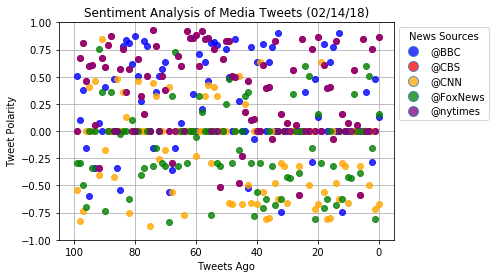

In [24]:
# Compound Sentiment Scatter Plot 

# ---------------------------------

bbc_plt = plt.plot(np.arange(len(bbc_pd["Compound"])),
         bbc_pd["Compound"], marker="o", color="blue", linewidth=0,
         alpha=0.8)


cbs_plt = plt.plot(np.arange(len(cbs_pd["Compound"])),
         cbs_pd["Compound"], marker="o", color="red", linewidth=0,
         alpha=0.8)

cnn_plt = plt.plot(np.arange(len(cnn_pd["Compound"])),
         cnn_pd["Compound"], marker="o", color="orange", linewidth=0,
         alpha=0.8)

fox_plt = plt.plot(np.arange(len(fox_pd["Compound"])),
         fox_pd["Compound"], marker="o", color="green", linewidth=0,
         alpha=0.8)

nytimes_plt = plt.plot(np.arange(len(nytimes_pd["Compound"])),
         nytimes_pd["Compound"], marker="o", color="purple", linewidth=0,
         alpha=0.8)

# define legend handle formatting
circ_bbc = Line2D([0], [0], linestyle="none", marker="o", alpha=0.75, markersize=10, markerfacecolor="blue")
circ_cbs= Line2D([0], [0], linestyle="none", marker="o", alpha=0.75, markersize=10, markerfacecolor="red")
circ_cnn = Line2D([0], [0], linestyle="none", marker="o", alpha=0.75, markersize=10, markerfacecolor="orange")
circ_fox = Line2D([0], [0], linestyle="none", marker="o", alpha=0.75, markersize=10, markerfacecolor="green")
circ_nytimes = Line2D([0], [0], linestyle="none", marker="o", alpha=0.75, markersize=10, markerfacecolor="purple")

# define x and y limits 

plt.ylim(-1, 1)
plt.xlim(105, -5)

# Print scatter plot w/ formatting and legend 

plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%x")), fontsize=12)
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.legend((circ_bbc, circ_cbs, circ_cnn, circ_fox, circ_nytimes), ("@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes"),
           numpoints=1, bbox_to_anchor = (1,1), title="News Sources")
plt.grid(True)
plt.show()

# save figure 

plt.savefig("Compound Sentiment Analysis of News Media Tweets.png", bbox='tight')

In [25]:
# Filter the DataFrame down only to those columns to chart
sentiment_bar_df = compound_df[["Media","Compound"]]

# Set the index to be "State" so they will be used as labels
sentiment_bar_df = sentiment_bar_df.set_index("Media")

avg_compound_media = sentiment_bar_df.groupby(["Media"]).mean()["Compound"]

avg_compound_media

Media
@BBC        0.212647
@CBS        0.334809
@CNN       -0.165498
@FoxNews   -0.135197
@nytimes   -0.025888
Name: Compound, dtype: float64

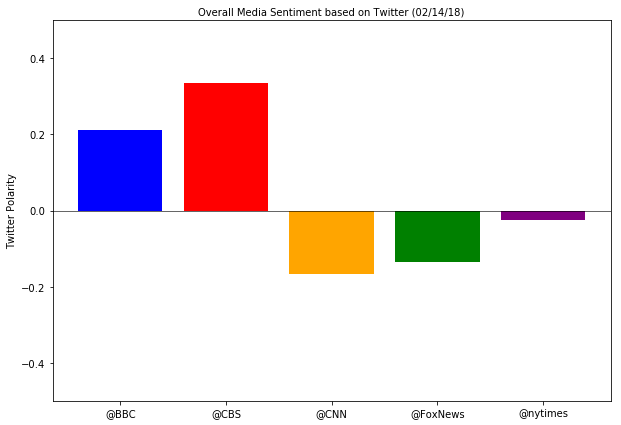

In [26]:
# Bar chart for media polarity scores based on media outlet 
#----------------------------------------------------------

# Labels for media channels 
tags = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes"]

# The colors of each media channel 
colors = ["blue", "red", "orange", "green", "purple"]

xaxis = np.arange(len(tags))
yaxis = avg_compound_media

plt.figure(figsize = (10,7))

plt.bar(xaxis, yaxis, color = colors, align="edge")

tick_locations = [value+.4 for value in xaxis]
plt.xticks(tick_locations, tags)
plt.ylim(-.5, .5)
plt.axhline(y=0, linestyle='-', linewidth = 1, color = "black", alpha = .6)
plt.ylabel("Twitter Polarity")
plt.title("Overall Media Sentiment based on Twitter (%s)" % (time.strftime("%x")), fontsize=10)
plt.savefig("Overall Media Sentiment Anlysis of Last 100 Tweets.png", bbox_inches = 'tight')
plt.show()

In [ ]:
# Analysis - as of 02/14/2018 CNN, FoxNews, and the New York Times, are all showing negative compounded scores
# as of 11:24 p.m. EST, while BBC, and CBS showed positive scores. 
    
# The value of this sort of analysis is that we can identify media trends and then take the media specific data 
# (tweet text) and determine the nature of the negative news. For instance, perhaps CNN, Fox, and NYtimes are all 
# reporting negative tweets about the current administration, some sort of political/celebrity scandal. Conversely, 
# this sort of exercise can help identify positive trends. What's making the BBC and CBS so happy at this moment? 
# Are they promoting fluff pieces? For instance, is everyone jazzed about a new celebrity couple, baby, or 
# (regarding the BBC) a royal wedding? More importantly, why focus on these rather than whatever their peers are 
# reporting? 

# Just from a brief look at the tweet text pulled from BBC, there was an overwhelming majority of tweets 
# addressing Valentines Day, with a few negative/cautionary tweets about drug abuse, and other serious matters. 

# CBS's overwhelming positivity was particularly interesting. When I dug into the text themselves it showed a much 
# longer span of time, and ranged from topics such as: The Best Super Bowl commercials, to finding the perfect 
# gift for your valentine, and the winter olympics. In short, it seems that of the media outlets reviewed, 
# CBS tweeted a lot of "happy" news. 

# CNN, was focused on school shootings, and controversy concerning the current presidential administration. They were
# far more critical and the word choice more evocative. Fox also covered the school shooting, but the overall 
# tone of the tweets was tempered by president Trump's attempts to console the nation in light of the tragedy. 
# As it is widely known that Fox is his preferred news network, this makes sense that he would tweet, retweet, and 
# be quoted by the network. 

# The NYTimes had the most varied content amongst the media networks examined. They covered everything from Valentine's
# day, the winter Olympics, and museum exhibits, and still touched on the aforementioned shooting. 
# I suspect that the variety of the news helped raise the score, because it wasn't focused on purely on tragedy, or 
# fluff. 


    
